## Digit classification using artml library

Handwritten Digit classification is one of the standard mutliclass classification tasks in Machine learning. Although this is not a core application for using real time learning, To understand the usage of library and the power of linear models for complicated classification tasks, we opted this for demonstrating the artml API.

In [1]:
import pandas as pd
import numpy as np
import os

First step, Load the digits dataset (8*8) from the sklearn datasets.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

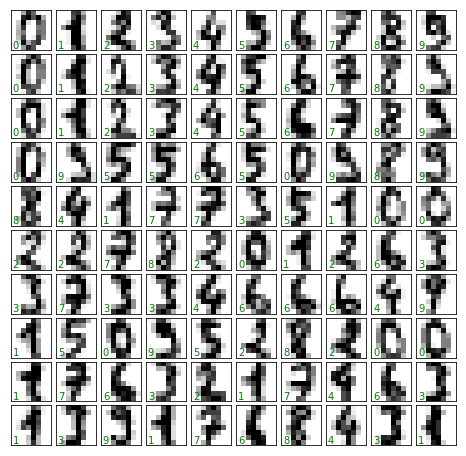

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Preprocess the data for one hot encoding the target feature and dividing the data into testing & training sets.

In [4]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [7]:
y1 = pd.DataFrame(ytrain)

In [8]:
y2 = pd.get_dummies(y1[0])

In [9]:
y2.columns = [str('Target_') +str(x) for x in range(0,10)]

In [10]:
Xtrain = pd.DataFrame(Xtrain)
Xtest = pd.DataFrame(Xtest)

In [11]:
Xtrain[39].sum()

0.0

In [13]:
#Finding the Univariate statistics for the dataset.
from artml.explore import stats


Since, we use QDA and SVC for classification, we need to make sure that the train data is not a singular matrix. Hence avoid null features from the dataset. [In the data exploration tasks observe these features and remove them while building the models]


In [14]:
Xtrain = Xtrain.drop(columns = [ 0, 24, 32, 39, 56] , axis=1)
Xtest = Xtest.drop(columns = [ 0, 24, 32, 39, 56] , axis=1)

In [15]:
Xtrain.shape

(1347, 59)


In the above case for explanation purpose, we divided the training data into two sets. First we will build models using only some part of the data. Later, we update the models just by using the new data.


In [16]:
Xtrain1 = Xtrain[:900]
ytrain1 = ytrain[:900]
y2_ = y2[:900]

In [17]:
train_data1 = pd.concat([Xtrain1, y2_], axis=1, sort=False)

In [18]:
Xtrain2 = Xtrain[900:]
ytrain2 = ytrain[900:]
y2_ = y2[900:]

In [19]:
train_data2 = pd.concat([Xtrain2, y2_], axis=1, sort=False)

Then import artml library by following the installation guidelines and build the Basic Element table.

In [20]:
from artml import bet

In [21]:
BET1 = bet.create_bet(train_data1)

In [22]:
#Importing artml explore for calculating univariate & bivariate statistics
stats.univariate(BET1)

,1,2,3,4,5,6,7,8,9,10,...,Target_0,Target_1,Target_2,Target_3,Target_4,Target_5,Target_6,Target_7,Target_8,Target_9
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
Mean,0.338889,5.336667,11.782222,11.967778,5.991111,1.375556,0.102222,0.007778,2.032222,10.492222,...,0.113333,0.104444,0.094444,0.106667,0.098889,0.110000,0.092222,0.088889,0.095556,0.095556
Variance,0.928488,23.125544,18.574795,17.566740,32.566588,10.690069,0.896217,0.012162,10.613406,29.094384,...,0.100489,0.093536,0.085525,0.095289,0.089110,0.097900,0.083717,0.080988,0.086425,0.086425
Standard_deviation,0.963581,4.808903,4.309849,4.191269,5.706714,3.269567,0.946688,0.110280,3.257822,5.393921,...,0.317000,0.305836,0.292446,0.308689,0.298513,0.312890,0.289339,0.284583,0.293981,0.293981
coeff_of_variation,284.335272,90.110605,36.579251,35.021284,95.253020,237.690663,926.107369,1417.888629,160.308369,51.408757,...,279.705728,292.821927,309.648757,289.395923,301.866851,284.445234,313.741510,320.156212,307.654291,307.654291
skewness,3.808494,0.564442,-1.240020,-1.208667,0.488797,2.759020,10.784675,15.580449,1.743773,-0.727296,...,2.447692,2.595360,2.782810,2.556929,2.696378,2.501222,2.828101,2.898870,2.760698,2.760698
Kurtosis,17.627641,-0.875051,0.809013,0.770709,-1.244290,7.151680,121.161123,257.526804,2.390448,-0.798222,...,3.995645,4.741171,5.750435,4.542944,5.276329,4.260857,6.004843,6.410586,5.627721,5.627721


In [23]:
# a = stats.univariate(BET1)
# b = a.loc[['Mean']]
# i, j = np.where(np.array(b) == 0)
# j

In [24]:
from artml.models import naive_bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(BET1, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9')
gnb.score(Xtest.as_matrix(), ytest)

0.8488888888888889

### QDA

In [25]:
from artml.models import QDA
qda = QDA.QuadraticDiscriminantAnalysis()
qda.fit(BET1, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9')
qda.score(Xtest, ytest)

0.07777777777777778

### SVC

In [26]:
from artml.models import svm
svc = svm.LinearSVC()
svc.fit(BET1, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9')
svc.score(Xtest, ytest)

0.17777777777777778


Eventhough QDA & SVC are powerful linear classification models we got a very low accuracy_score while testing these models. This might be because of the small amount of the training data. As, Naive bayes also works at small training datasets we got good accuracies in that case.

Now lets try improving the model accuracy by using more training data instead of building complex models. for updating the model in real time first update the BET with new data using the `learn` function.

In [27]:
BET2 = bet.learn(BET1, train_data2)

In [28]:
from artml.models import naive_bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(BET2, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9')
gnb.score(Xtest.as_matrix(), ytest)

0.82

In [29]:
from artml.models import QDA
qda = QDA.QuadraticDiscriminantAnalysis()
qda.fit(BET2, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9')
y_pred = qda.predict(Xtest)
qda.score(Xtest, ytest)

0.9288888888888889

In [30]:
from artml.models import svm
svc = svm.LinearSVC()
svc.fit(BET2, 'Target_0', 'Target_1','Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7','Target_8', 'Target_9', c=0.00001)
svc.score(Xtest, ytest)

0.44222222222222224

After running the same above models we can observe that Naive_Bayes model accuracy slightly decreased - 82%. But `QDA` and SVC model accuracies largely improved to `93%` & 45%. Below is the confusion matrix for the QDA predictions.

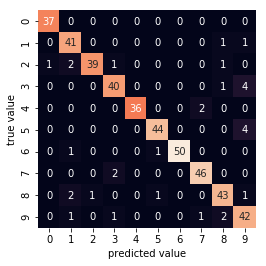

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Hence we can clearly see that QDA is a powerful linear model even for multiclass classification given enough amount of data. So, we can use these kind of models in real scenarios where we get continous data and where models need to be updated in real time for generating real time insights.

Use this simple yet  powerful API for building the realtime models. If you have an application of artml that is concise and powerful, please consider adding it to our collection of examples.

Happy Learning!
